In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
t, g, k, m1, m2, l1, l2 = sp.symbols("t g k M1 M2 L1 L2")

In [4]:
th1, th2, x = sp.symbols(r"\theta_1 , \theta_2 , x", cls=sp.Function)

In [5]:
th1 = th1(t)
th2 = th2(t)
x = x(t)

In [6]:
th1_d = sp.diff(th1,t)
th2_d = sp.diff(th2,t)
x_d = sp.diff(x,t)
th1_dd = sp.diff(th1_d,t)
th2_dd = sp.diff(th2_d,t)
x_dd = sp.diff(x_d,t)

In [7]:
x1 = l1*sp.sin(th1)
x2 = (l2+x)*sp.sin(th2) + l1*sp.sin(th1)
y1 = -l1*sp.cos(th1)
y2 = -l1*sp.cos(th1) - (l2+x)*sp.cos(th2)

In [8]:
x1

L1*sin(\theta_1(t))

In [9]:
x2

L1*sin(\theta_1(t)) + (L2 + x(t))*sin(\theta_2(t))

In [10]:
y1

-L1*cos(\theta_1(t))

In [11]:
y2

-L1*cos(\theta_1(t)) - (L2 + x(t))*cos(\theta_2(t))

In [12]:
T = 1/2 * m1 * (sp.diff(x1,t)**2 + sp.diff(y1,t)**2) + 1/2 * m2* (sp.diff(x2,t)**2 + sp.diff(y2,t)**2)
T

0.5*M1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*M2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (-L2 - x(t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) - cos(\theta_2(t))*Derivative(x(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (L2 + x(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) + sin(\theta_2(t))*Derivative(x(t), t))**2)

In [13]:
V = m1*g*y1 + m2 *g* y2 + 1/2*k*x**2
V

-L1*M1*g*cos(\theta_1(t)) + M2*g*(-L1*cos(\theta_1(t)) - (L2 + x(t))*cos(\theta_2(t))) + 0.5*k*x(t)**2

**Lagrangian**

In [14]:
L = T- V
L

L1*M1*g*cos(\theta_1(t)) + 0.5*M1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) - M2*g*(-L1*cos(\theta_1(t)) - (L2 + x(t))*cos(\theta_2(t))) + 0.5*M2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (-L2 - x(t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) - cos(\theta_2(t))*Derivative(x(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (L2 + x(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) + sin(\theta_2(t))*Derivative(x(t), t))**2) - 0.5*k*x(t)**2

In [15]:
LE1 = sp.diff(L,th1) - sp.diff(sp.diff(L,th1_d),t).simplify()
LE1

-L1*M1*g*sin(\theta_1(t)) - L1*M2*g*sin(\theta_1(t)) - L1*(L1*M1*Derivative(\theta_1(t), (t, 2)) + M2*(L1*Derivative(\theta_1(t), (t, 2)) - L2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + L2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - x(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + x(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + x(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - sin(\theta_1(t) - \theta_2(t))*Derivative(x(t), (t, 2)) - cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(x(t), t) + 2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)*Derivative(x(t), t))) + 0.5*M2*(2*L1*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (-L2 - x(t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) - cos(\theta_2(t))*Derivative(x(t), t))*cos(\theta_1(t))*Derivat

In [16]:
LE2 = sp.diff(L,th2) - sp.diff(sp.diff(L,th2_d),t).simplify()
LE2

M2*g*(-L2 - x(t))*sin(\theta_2(t)) + 0.5*M2*((-2*(L2 + x(t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) + 2*cos(\theta_2(t))*Derivative(x(t), t))*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (L2 + x(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) + sin(\theta_2(t))*Derivative(x(t), t)) + (2*(L2 + x(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) + 2*sin(\theta_2(t))*Derivative(x(t), t))*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (-L2 - x(t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) - cos(\theta_2(t))*Derivative(x(t), t))) - 1.0*M2*(-L1*L2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L1*L2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L1*L2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - L1*x(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L1*x(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L1*x(t)*cos(\theta_1(t) - \theta_2(t))*Derivat

In [17]:
LE3 = sp.diff(L,x) - sp.diff(sp.diff(L,x_d),t).simplify()
LE3

M2*g*cos(\theta_2(t)) + 0.5*M2*(2*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (-L2 - x(t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) - cos(\theta_2(t))*Derivative(x(t), t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) + 2*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (L2 + x(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) + sin(\theta_2(t))*Derivative(x(t), t))*cos(\theta_2(t))*Derivative(\theta_2(t), t)) - 1.0*M2*(-L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + Derivative(x(t), (t, 2))) - 1.0*k*x(t)

In [18]:
solutions = sp.solve([LE1, LE2, LE3], (th1_dd, th2_dd, x_dd), simplify=False, rational =False)

In [19]:
dz1dt = sp.lambdify((t,g,k,m1,m2,l1,l2,th1,th2,x,th1_d,th2_d,x_d),solutions[th1_dd])
dz2dt = sp.lambdify((t,g,k,m1,m2,l1,l2,th1,th2,x,th1_d,th2_d,x_d),solutions[th2_dd])
dz3dt = sp.lambdify((t,g,k,m1,m2,l1,l2,th1,th2,x,th1_d,th2_d,x_d),solutions[x_dd])
dth1dt = sp.lambdify(th1_d,th1_d)
dth2dt = sp.lambdify(th2_d,th2_d)
dxdt = sp.lambdify(x_d,x_d)

In [20]:
def dVecdt(Vec, t, g, k, m1, m2, l1, l2):
    th1, z1,  th2, z2, x, z3 = Vec
    return [
        dth1dt(z1),
        dz1dt(t,g,k,m1,m2,l1,l2,th1,th2,x,z1,z2,z3),
        dth2dt(z2),
        dz2dt(t,g,k,m1,m2,l1,l2,th1,th2,x,z1,z2,z3),
        dxdt(z3),
        dz3dt(t,g,k,m1,m2,l1,l2,th1,th2,x,z1,z2,z3)
    ]

In [29]:
t = np.linspace(0,100,10_00_000+1)
g = 9.8
k = 1.35400296296
m1 = 2.06
m2 = 5.4
l1 = 2.5
l2 = 1.25
sol = odeint(dVecdt, y0 = [np.pi/2, 0 ,np.pi/4, 0, 39.084, 1.1], t = t, args =(g,k,m1,m2,l1,l2))
#y0 = [1, -3, -1, 5, 1, ] is the initial condition th1 = 1, z1 = -3, th2 = -1, z2 = 5

In [30]:
th1 = sol.T[0]
th2 = sol.T[2]
x = sol.T[4]
z1 = sol.T[1]
z2 = sol.T[3]
z3 = sol.T[5]

In [31]:
x1 = l1*np.sin(th1)
y1 = -l1*np.cos(th1)
x2 = (l2+x)*np.sin(th2) + l1*np.sin(th1)
y2 = -l1*np.cos(th1) - (l2+x)*np.cos(th2)

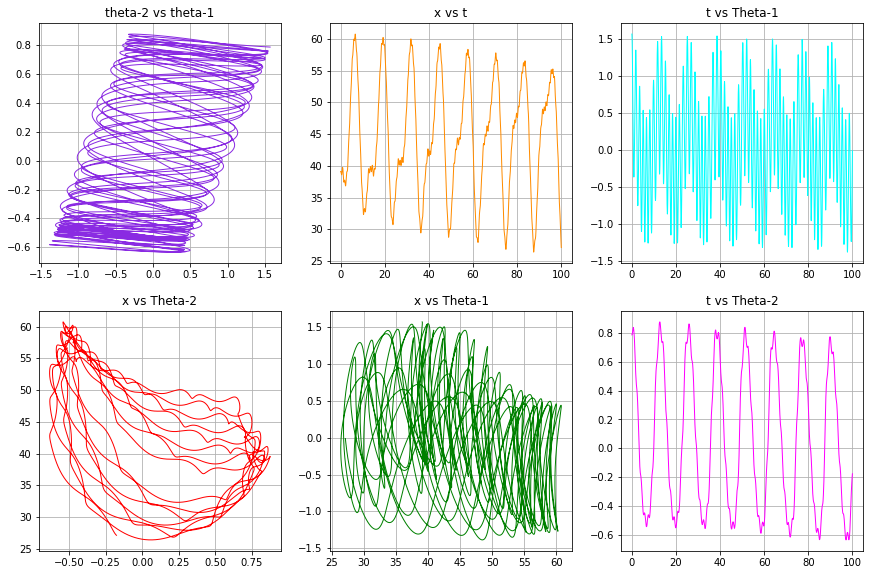

In [32]:
fig = plt.figure(figsize=(20,15))
#ax1 = fig.add_subplot(221)
#plt.grid()
#ax1.plot(x2,y2,label=r"$(x_2,y_2)$",color="Blue")
#ax1.plot(x1,y1,label=r"$(x_1,y_1)$",color="Red",linewidth=4)
#ax1.legend()
#plt.title("Trace of two masses")
ax2 = fig.add_subplot(341)
plt.grid()
ax2.plot(th1,th2,color="blueviolet",linewidth=1)
plt.title("theta-2 vs theta-1")
ax3 = fig.add_subplot(342)
plt.grid()
ax3.plot(t,x,color="darkorange",linewidth=1)
plt.title("x vs t")
ax4 = fig.add_subplot(345)
plt.grid()
ax4.plot(th2,x,color="Red",linewidth=1)
plt.title("x vs Theta-2")
ax5 = fig.add_subplot(346)
plt.grid()
ax5.plot(x,th1,color="green",linewidth=1)
plt.title("x vs Theta-1")
ax6 = fig.add_subplot(343)
plt.grid()
ax6.plot(t,th1,color="cyan",linewidth=1)
plt.title("t vs Theta-1")
ax7 = fig.add_subplot(347)
plt.grid()
ax7.plot(t,th2,color="magenta",linewidth=1)
plt.title("t vs Theta-2")
plt.show()